In [65]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

In [174]:
df = pd.read_csv('/Users/richardwestbrook/Library/Mobile Documents/com~apple~CloudDocs/Learning/Projects/Churn_Modelling.csv')

In [175]:
df.drop(['RowNumber','Surname'], axis=1, inplace=True)
df.isnull().any()

CustomerId         False
CreditScore        False
Geography          False
Gender             False
Age                False
Tenure             False
Balance            False
NumOfProducts      False
HasCrCard          False
IsActiveMember     False
EstimatedSalary    False
Exited             False
dtype: bool

In [176]:
df.head()

,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [180]:
cat_feats = ['Geography','Gender']
df = pd.get_dummies(df,columns=cat_feats,drop_first=True)

In [181]:
X = df.drop('Exited',axis=1)
y = df['Exited']

In [182]:
from sklearn.preprocessing import StandardScaler

In [183]:
scaler = StandardScaler()
scaler.fit(X)

StandardScaler()

In [184]:
scaled_data = scaler.transform(X)

In [185]:
from sklearn.decomposition import PCA

In [186]:
pca = PCA(n_components=2)

In [187]:
pca.fit(scaled_data)

PCA(n_components=2)

In [188]:
x_pca = pca.transform(scaled_data)

In [189]:
scaled_data.shape

(10000, 12)

In [190]:
x_pca.shape

(10000, 2)

In [192]:
df['exited']

KeyError: 'exited'

No handles with labels found to put in legend.


Text(0, 0.5, 'Second Principal Component')

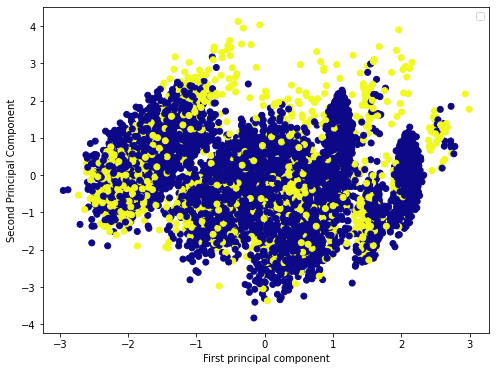

In [193]:
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1],c=y,cmap='plasma')
plt.legend()
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

In [194]:
pca.components_

array([[ 2.50537886e-02, -8.03578215e-05, -7.98244682e-02,
         1.96904385e-02, -5.98079914e-01,  2.97450599e-01,
        -2.14350064e-03,  3.30717309e-02, -1.79807215e-02,
        -5.98017990e-01,  4.32522022e-01,  1.77127859e-02],
       [ 3.32938021e-02, -7.86538878e-03, -2.68956109e-01,
         1.60698117e-01, -2.56442986e-01,  6.31786835e-01,
         1.60302922e-01, -2.92774278e-01,  1.35064347e-01,
         2.70453737e-01, -4.36834850e-01, -2.05242986e-01]])

In [197]:
df_comp = pd.DataFrame(pca.components_,columns=X.columns)

<AxesSubplot:>

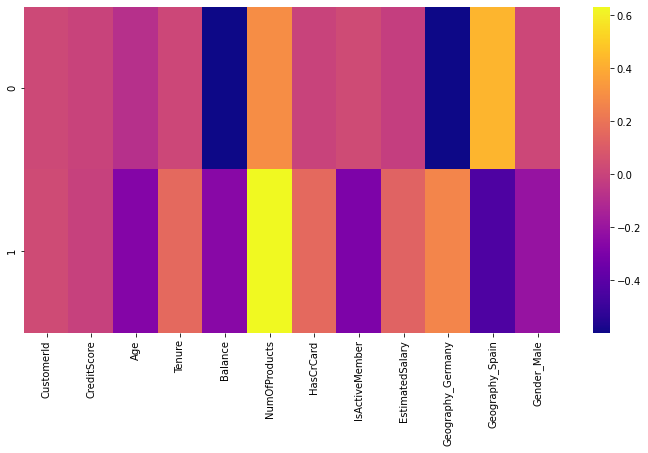

In [198]:
plt.figure(figsize=(12,6))
sns.heatmap(df_comp,cmap='plasma',)